CONTRACEPTIVE USE PREDICTION

In [23]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as mp
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')

# data prepocessing
# import DHS csv file
path = "/content/dhs_data_2024_selected_districts.csv"
df = pd.read_csv(path)
df.head()

,district,region,residence,age,marital_status,edulevel,religion,ethnicity,num_children,fertility_preference,contraceptive_method,current_job,wealth_index,freq_of_watching_tv,contraceptive_use
0,mangochi - urban,southern region,urban,26,married,primary,muslim,lomwe,2,have another,no method,no,middle,not at all,not using
1,mchinji - urban,central region,urban,23,married,secondary,muslim,chewa,1,have another,modern method,yes,richest,at least once a week,injections
2,mchinji - urban,central region,urban,23,never in union,secondary,other christian,chewa,0,have another,no method,yes,richest,less than once a week,not using
3,mchinji - urban,central region,urban,15,never in union,primary,ccap,other,0,have another,no method,yes,richest,not at all,not using
4,salima - urban,central region,urban,31,married,primary,other christian,chewa,4,sterilized (respondent or partner),modern method,no,richer,less than once a week,female sterilization


DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   district              2770 non-null   object
 1   region                2770 non-null   object
 2   residence             2770 non-null   object
 3   age                   2770 non-null   int64 
 4   marital_status        2770 non-null   object
 5   edulevel              2770 non-null   object
 6   religion              2770 non-null   object
 7   ethnicity             2770 non-null   object
 8   num_children          2770 non-null   int64 
 9   fertility_preference  2770 non-null   object
 10  contraceptive_method  2770 non-null   object
 11  current_job           2770 non-null   object
 12  wealth_index          2770 non-null   object
 13  freq_of_watching_tv   2770 non-null   object
 14  contraceptive_use     2770 non-null   object
dtypes: int64(2), object(13)
memory usage: 

In [ ]:
# checking null values
df.isnull().sum()

,0
district,0
region,0
residence,0
age,0
marital_status,0
edulevel,0
religion,0
ethnicity,0
num_children,0
fertility_preference,0


EXPLORATARY DATA ANALYSIS

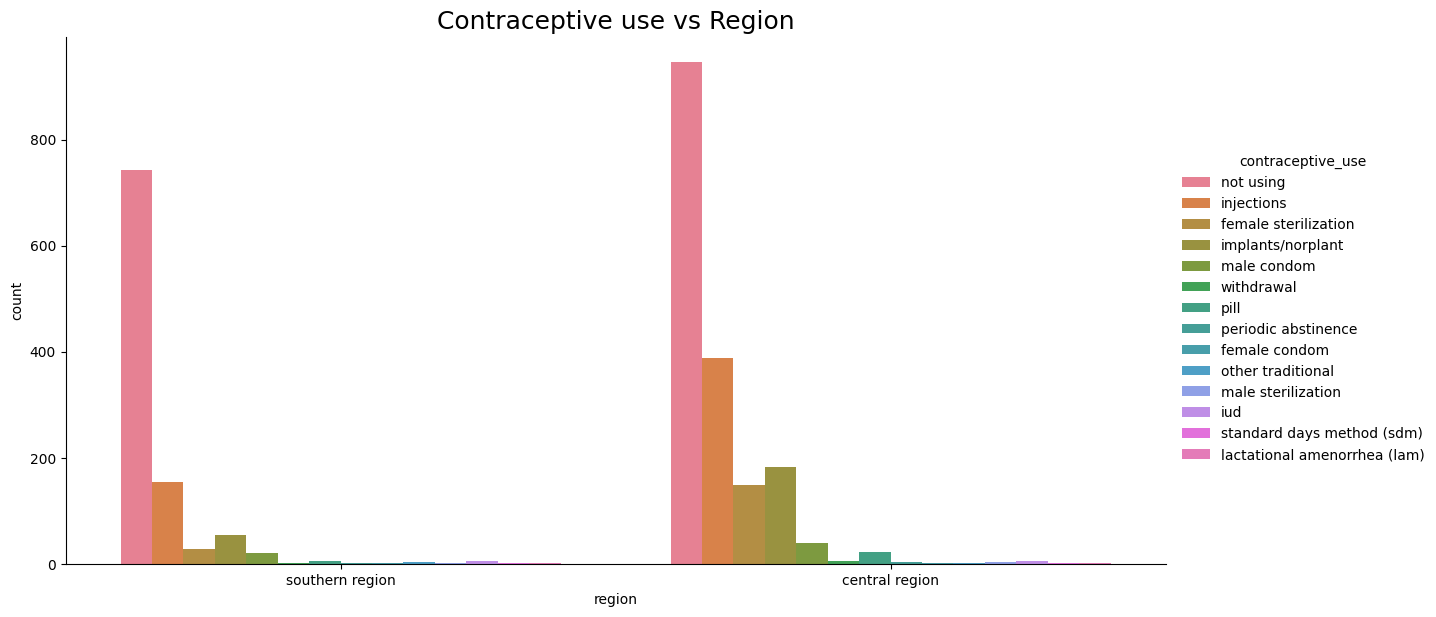

In [ ]:
# # create a plot for using catplot for Gender and Diagnosis
sns.catplot(data=df, x="region",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title("Contraceptive use vs Region", fontsize=18)
plt.show()


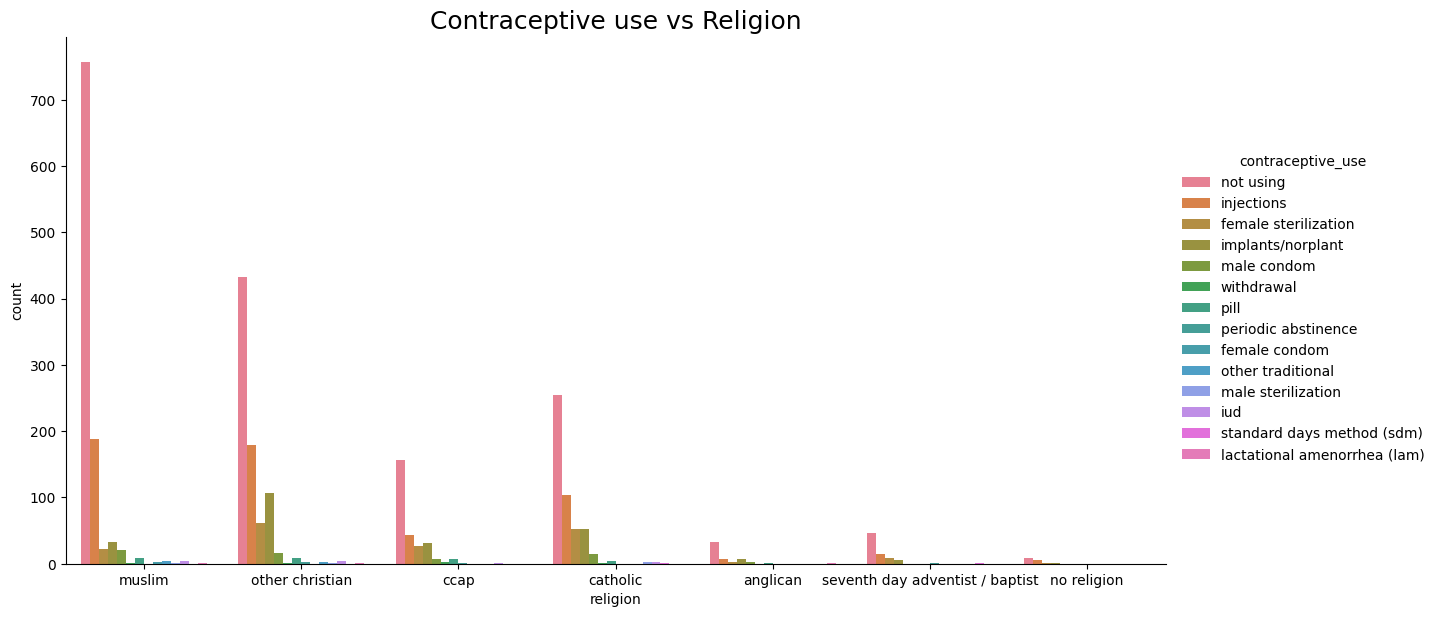

In [ ]:
# create a plot for using catplot for Contraceptives and Religion
sns.catplot(data=df, x="religion",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title("Contraceptive use vs Religion", fontsize=18)
plt.show()

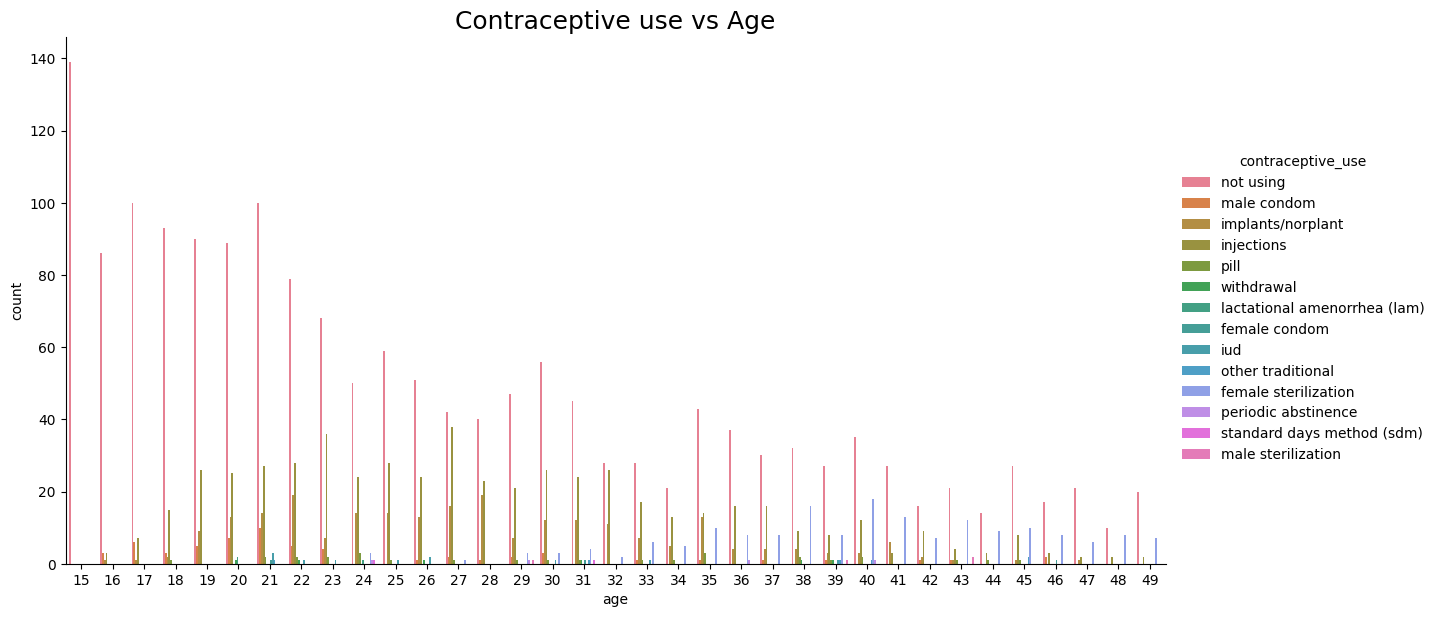

In [ ]:
# create a plot for using catplot for Age and Contraceptive use
sns.catplot(data=df, x="age",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title("Contraceptive use vs Age", fontsize=18)
plt.show()

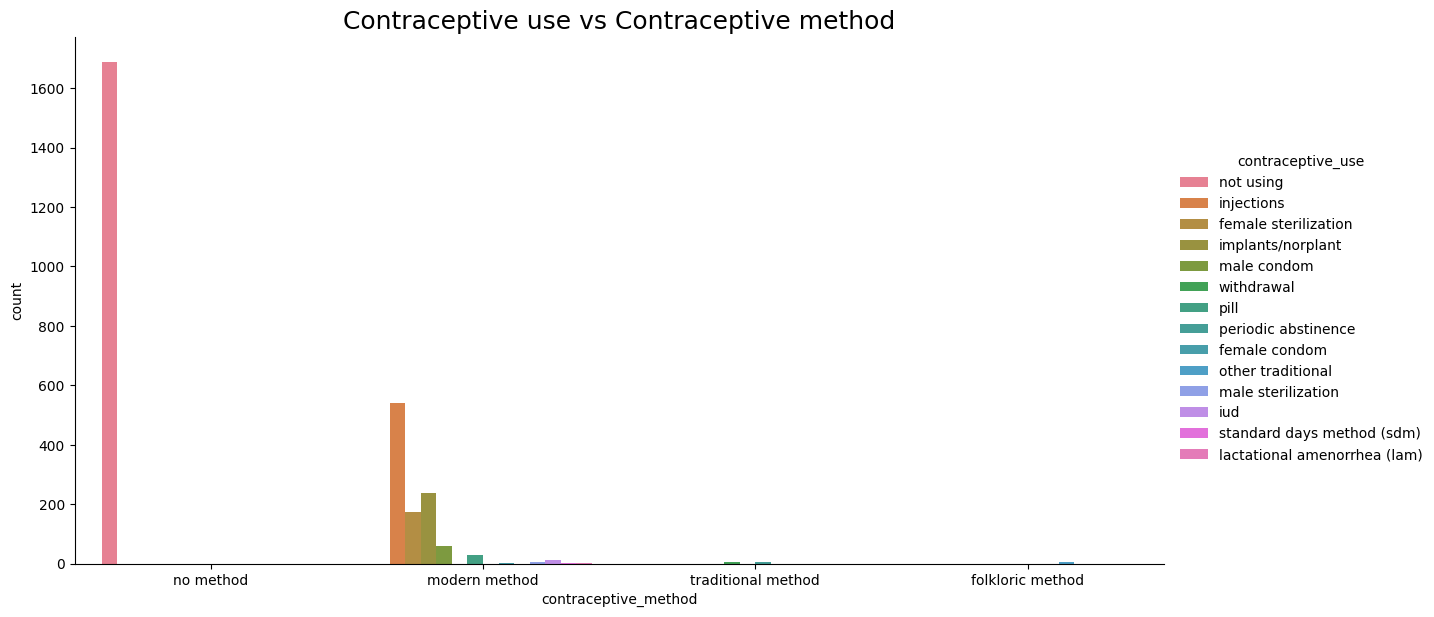

In [ ]:
# create a plot for using catplot for Contraceptive use and Contraceptive method
sns.catplot(data=df, x="contraceptive_method",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title("Contraceptive use vs Contraceptive method", fontsize=18)
plt.show()

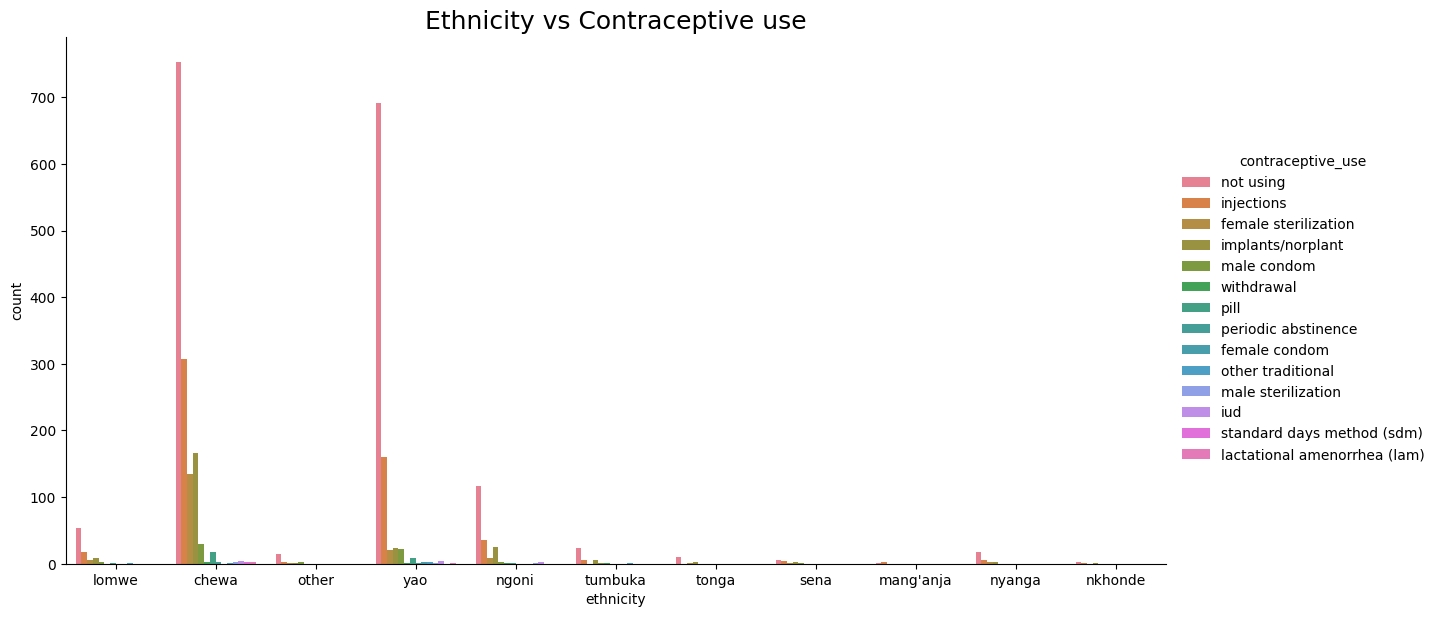

In [ ]:
# create a plot for using catplot for Gender and Diagnosis
sns.catplot(data=df, x="ethnicity",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title("Ethnicity vs Contraceptive use", fontsize=18)
plt.show()

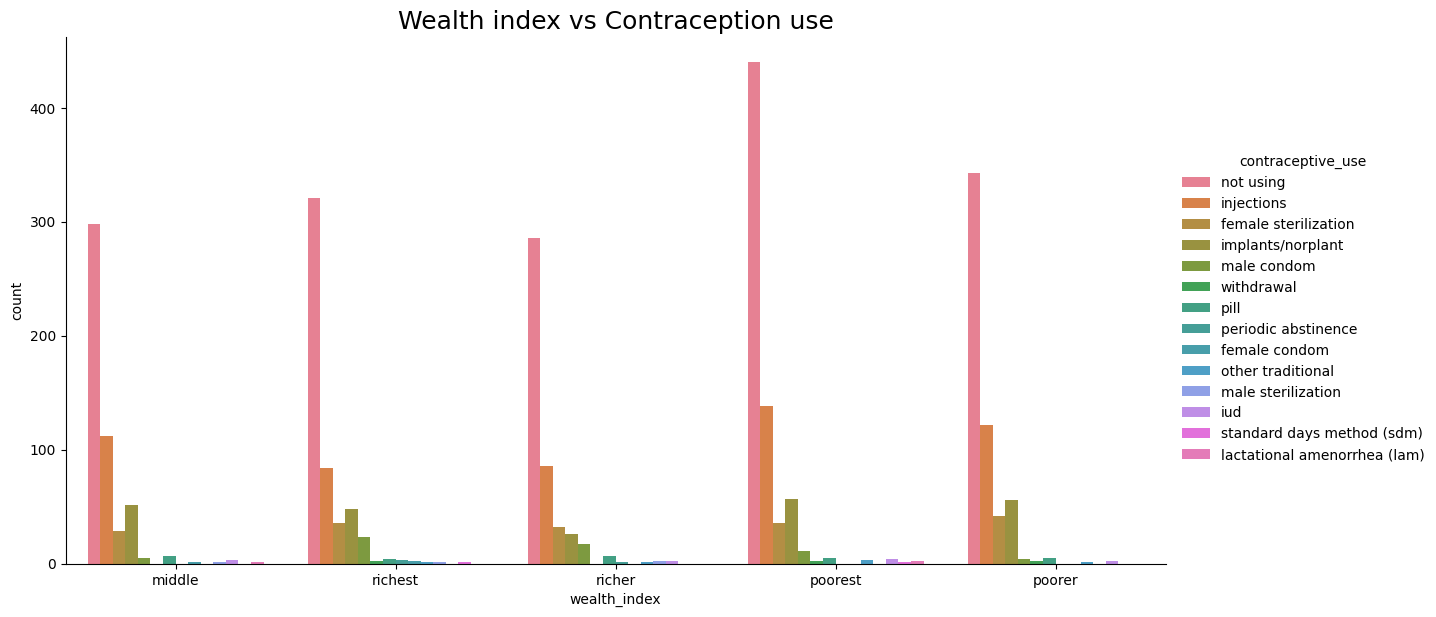

In [ ]:
# create a plot for using catplot for Gender and Diagnosis
sns.catplot(data=df, x="wealth_index",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title('Wealth index vs Contraception use', fontsize=18)
plt.show()

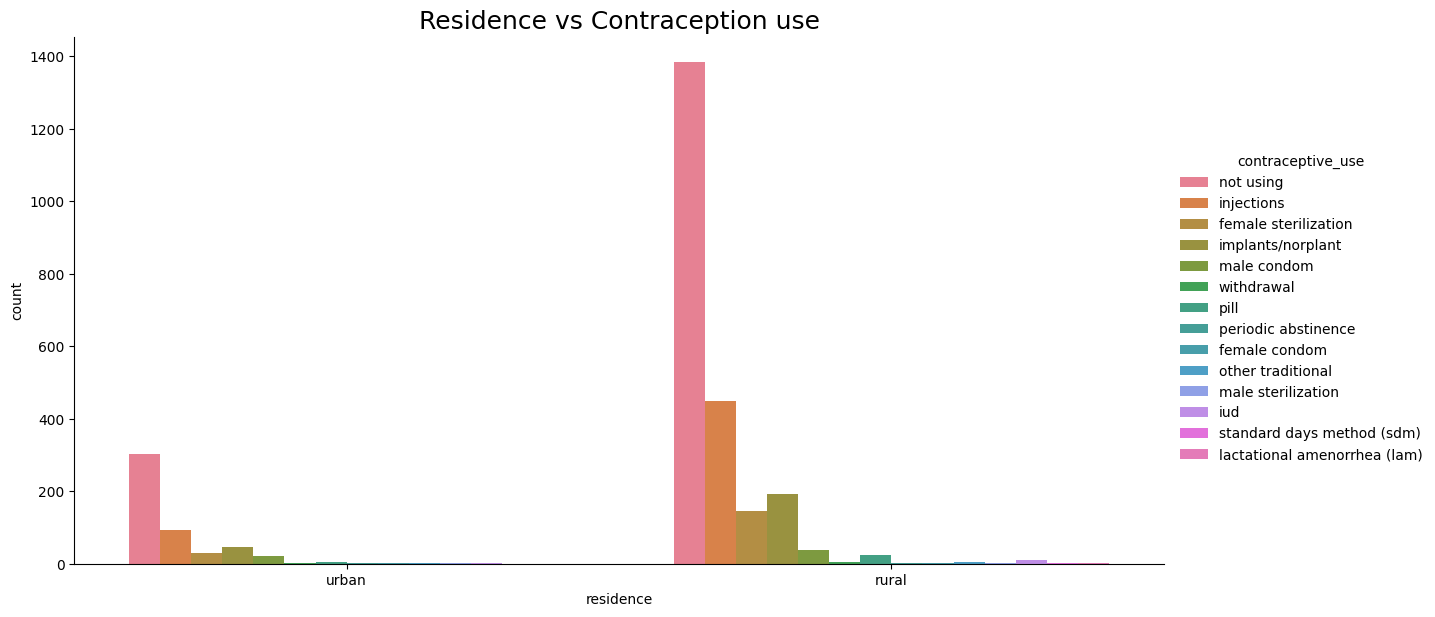

In [ ]:
# create a plot for using catplot for contraception use and residence
sns.catplot(data=df, x="residence",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title('Residence vs Contraception use', fontsize=18)
plt.show()

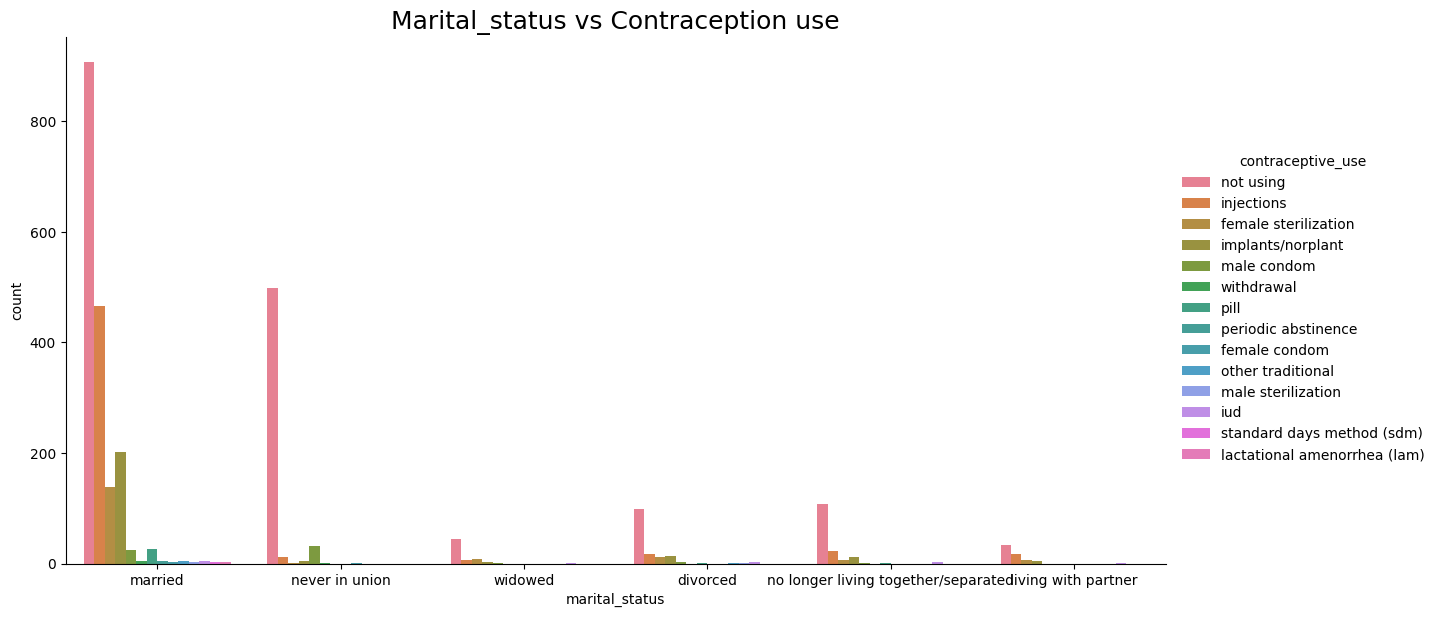

In [13]:
# create a plot for using catplot for contraception use and residence
sns.catplot(data=df, x="marital_status",hue="contraceptive_use",kind="count", height=6, aspect=2)

# Adding a title to the catplot
plt.title('Marital_status vs Contraception use', fontsize=18)
plt.show()

In [15]:
# create lable encoder object
le = LabelEncoder()

encoder=LabelEncoder()
columns = ['residence','marital_status','edulevel','religion','ethnicity','fertility_preference','contraceptive_method','current_job',
           'wealth_index','freq_of_watching_tv','contraceptive_use']
for col in columns:
    df[col] = encoder.fit_transform(df[col])

# drop region and district
df.drop(['region','district'], axis=1, inplace=True)
df.head()

,residence,age,marital_status,edulevel,religion,ethnicity,num_children,fertility_preference,contraceptive_method,current_job,wealth_index,freq_of_watching_tv,contraceptive_use
0,1,26,2,2,3,1,2,1,2,0,0,2,8
1,1,23,2,3,3,0,1,1,1,1,4,0,3
2,1,23,3,3,5,0,0,1,2,1,4,1,8
3,1,15,3,2,2,6,0,1,2,1,4,2,8
4,1,31,2,2,5,0,4,3,1,0,3,1,1


In [19]:
# Split data into training and testing sets
X = df.drop(columns=['contraceptive_use'])
y = df['contraceptive_use']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", xtrain.shape)
print("Test set size:", xtest.shape)

Training set size: (2216, 12)
Test set size: (554, 12)


CLASSIFICATION USING DECISION TREE AND RANDOM FOREST

Decision Tree Accuracy: 0.8375451263537906
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.97      0.97        36
           2       0.36      0.42      0.39        45
           3       0.61      0.56      0.59       101
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.33      0.45      0.38        11
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00       345
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2

    accuracy                           0.84       554
   macro avg       0.35      0.35      0.34       554

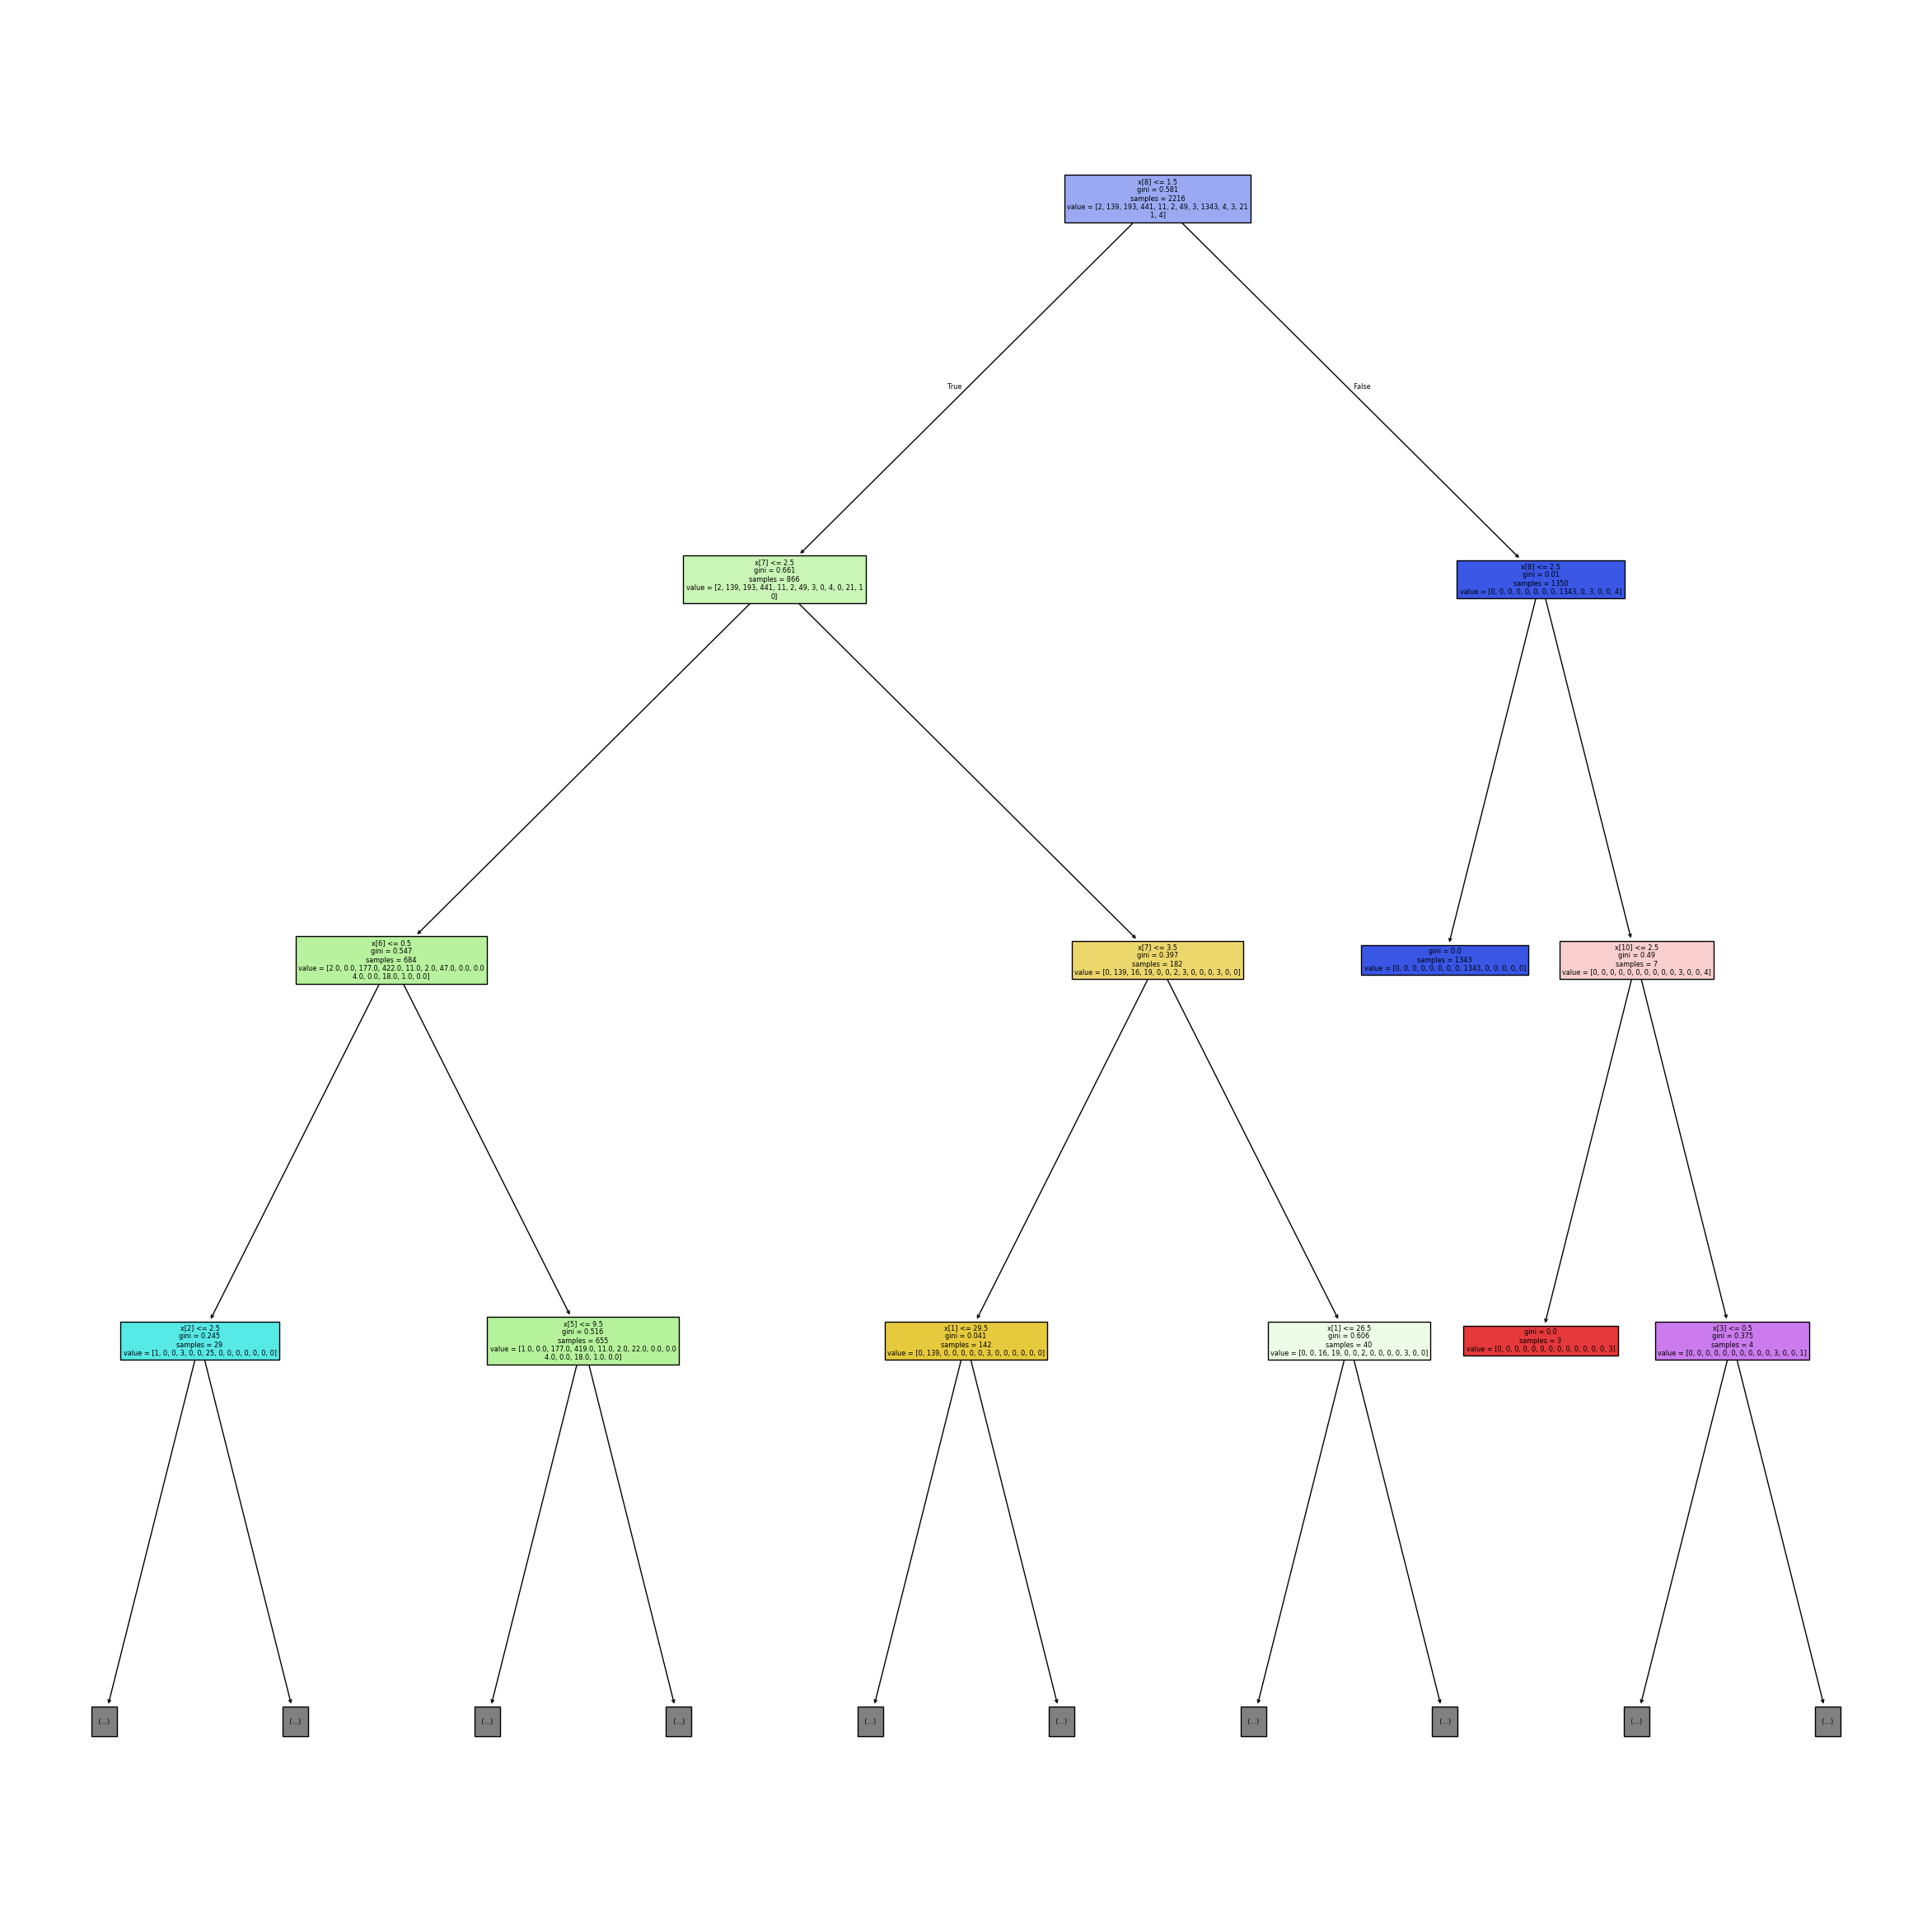

In [27]:
# decision tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(xtrain, ytrain)
decision_tree_predictions = decision_tree_model.predict(xtest)
decision_tree_accuracy = accuracy_score(ytest, decision_tree_predictions)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", classification_report(ytest, decision_tree_predictions))

# Visualize Decision Tree
from sklearn.tree import plot_tree
plt.figure (figsize= (30,30))
plot_tree(decision_tree_model,max_depth=3, filled= True);

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(xtrain, ytrain)
random_forest_predictions = random_forest_model.predict(xtest)
random_forest_accuracy = accuracy_score(ytest, random_forest_predictions)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", classification_report(ytest, random_forest_predictions))